# INTRODUCTION TO PYTHON FOR DATA SCIENCE

## _Python Fundamentals through Examples_

## EIPA
online, September 18 - 22, 2023

### [Dr. Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Python Ecosystem

# Teaser

<img src="https://images.unsplash.com/photo-1523975864490-174dd4d9a41e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=3870&q=80" alt="transaction" width="1000px"/>

**You can become dangerous in a weekend and useful in a week.**

## Eurostat Dataset

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/lan_lcv_ovw/default/table?lang=en" width="1000" height="600"></iframe>

## Machine Learning

In [ ]:
%%html
<iframe width="1000" height="562" src="https://www.youtube.com/embed/spfpBrBjntg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## EuroSAT Dataset
https://www.tensorflow.org/datasets/catalog/eurosat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 20.6 MB/s eta 0:00:00


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling eurosat/rgb/2.0.0.incompleteEFPUKQ/eurosat-train.tfrecord*...:   0%|          | 0/27000 [00:00<?, ? …

Dataset eurosat downloaded and prepared to ./eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


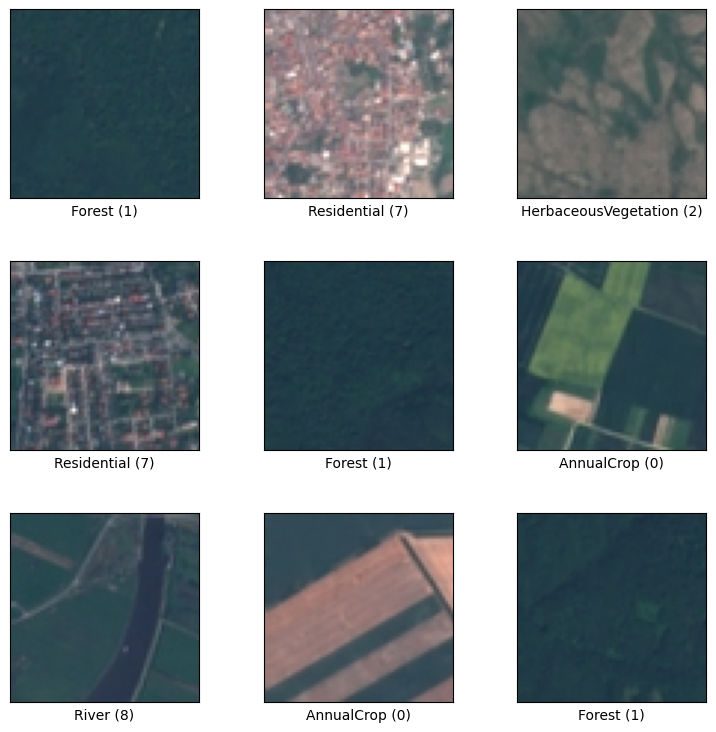

In [ ]:
# installations
!pip install -qU tensorflow_datasets

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.utils import to_categorical
import tensorflow_datasets as tfds
from keras.applications.resnet import preprocess_input

# download data
ds, ds_info = tfds.load('eurosat/rgb',
                        with_info=True,
                        split='train',
                        data_dir='.')

tfds.show_examples(ds, ds_info);

### Under the hood

In [ ]:
df = tfds.as_dataframe(ds, ds_info)[:7_500]
print(np.stack(df['image'].values).shape)
df.sample(10)

(7500, 64, 64, 3)


,filename,image,label
4335,b'Residential_639.jpg',"[[[115, 95, 106], [115, 92, 100], [132, 101, 1...",7
1317,b'Residential_1412.jpg',"[[[151, 151, 141], [154, 150, 141], [167, 156,...",7
2260,b'SeaLake_119.jpg',"[[[75, 105, 113], [75, 105, 113], [74, 107, 11...",9
7045,b'Highway_325.jpg',"[[[97, 110, 116], [102, 113, 117], [75, 85, 87...",3
1898,b'River_1762.jpg',"[[[74, 78, 89], [73, 77, 88], [73, 77, 88], [7...",8
5121,b'Residential_509.jpg',"[[[75, 87, 101], [76, 90, 101], [70, 84, 93], ...",7
6145,b'Forest_1862.jpg',"[[[28, 54, 67], [27, 53, 66], [32, 54, 67], [3...",1
3645,b'Residential_2970.jpg',"[[[174, 171, 200], [171, 171, 197], [72, 79, 9...",7
439,b'AnnualCrop_2573.jpg',"[[[63, 82, 89], [62, 81, 87], [67, 82, 89], [6...",0
6098,b'Industrial_475.jpg',"[[[69, 95, 96], [67, 95, 96], [65, 96, 98], [6...",4


### Data Distribution

In [ ]:
df.groupby('label')['label'].value_counts()

label  label
0      0        882
1      1        847
2      2        839
3      3        711
4      4        693
5      5        489
6      6        695
7      7        816
8      8        684
9      9        844
Name: label, dtype: int64

### Training & Test Datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.stack(df['image'].values),
                                                    np.stack(df['label'].values),
                                                    test_size=0.333333,
                                                    shuffle=True,
                                                    random_state=10)

X2_train = preprocess_input(X_train).repeat(2, axis=1).repeat(2, axis=2)
X2_test = preprocess_input(X_test).repeat(2, axis=1).repeat(2, axis=2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (5000, 64, 64, 3) (5000, 10)
Test:  (2500, 64, 64, 3) (2500, 10)


## AI Model

### Pretrained Microsoft [ResNet](https://en.wikipedia.org/wiki/Residual_neural_network)

In [ ]:
from keras.applications.resnet import ResNet50
model_base = ResNet50(include_top=False,
                      pooling='avg',
                      input_tensor=layers.Input(shape=(128, 128, 3)))
model_base.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                      

### Custom Classification Layer

In [ ]:
def resnet():
  model_base.trainable = False

  model = keras.Sequential([
      model_base,
      layers.Flatten(),
      layers.Dense(128, activation='relu', name='dense_1'),
      layers.Dropout(0.5, name='drop_1'),
      layers.Dense(64, activation='relu', name='dense_2'),
      layers.Dropout(0.5, name='drop_2'),
      layers.Dense(10, activation='softmax', name='output')
  ])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

### Training

In [ ]:
%%time
model = resnet()

history = model.fit(
    X2_train,
    y_train,
    validation_split=0.15,
    epochs=10,
    batch_size=256,
    verbose=1)

Epoch 1/10
17/17 [==============================] - 402s 23s/step - loss: 2.1961 - accuracy: 0.2838 - val_loss: 1.1235 - val_accuracy: 0.7840
Epoch 2/10
17/17 [==============================] - 367s 22s/step - loss: 1.3222 - accuracy: 0.5499 - val_loss: 0.5857 - val_accuracy: 0.8640
Epoch 3/10
17/17 [==============================] - 377s 23s/step - loss: 0.9242 - accuracy: 0.6894 - val_loss: 0.3816 - val_accuracy: 0.9027
Epoch 4/10
17/17 [==============================] - 366s 22s/step - loss: 0.7180 - accuracy: 0.7671 - val_loss: 0.2977 - val_accuracy: 0.9053
Epoch 5/10
17/17 [==============================] - 335s 20s/step - loss: 0.5899 - accuracy: 0.8115 - val_loss: 0.2676 - val_accuracy: 0.9160
Epoch 6/10
17/17 [==============================] - 366s 22s/step - loss: 0.4913 - accuracy: 0.8511 - val_loss: 0.2381 - val_accuracy: 0.9240
Epoch 7/10
17/17 [==============================] - 368s 22s/step - loss: 0.4384 - accuracy: 0.8642 - val_loss: 0.2306 - val_accuracy: 0.9307
Epoch 

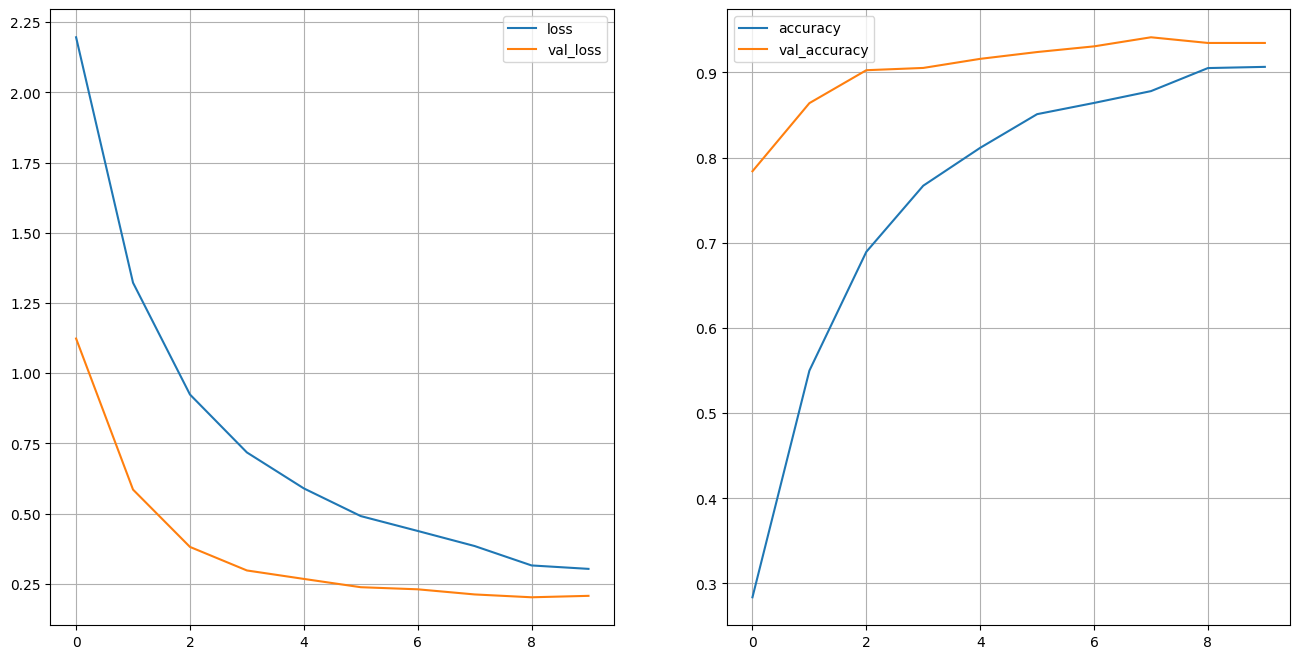

In [ ]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

### Evaluation

In [ ]:
scores = model.evaluate(X2_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 6.76%


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X2_test)
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

print(cf_matrix)

79/79 [==============================] - 157s 2s/step
[[272   0   1   2   0   4   2   2  10   1]
 [  0 287   6   0   0   2   0   0   0   3]
 [  0   8 270   0   0   3   7   1   1   0]
 [  5   2   1 199   1   1   0   1  23   0]
 [  1   0   0   2 209   0   0   2   0   0]
 [  3   3   6   0   0 159   0   0   6   1]
 [ 12   0  14   2   1   1 199   0   1   0]
 [  0   0   4   0   3   1   1 254   0   0]
 [  3   0   0   8   0   3   0   0 199   1]
 [  0   2   0   1   0   0   0   0   0 283]]


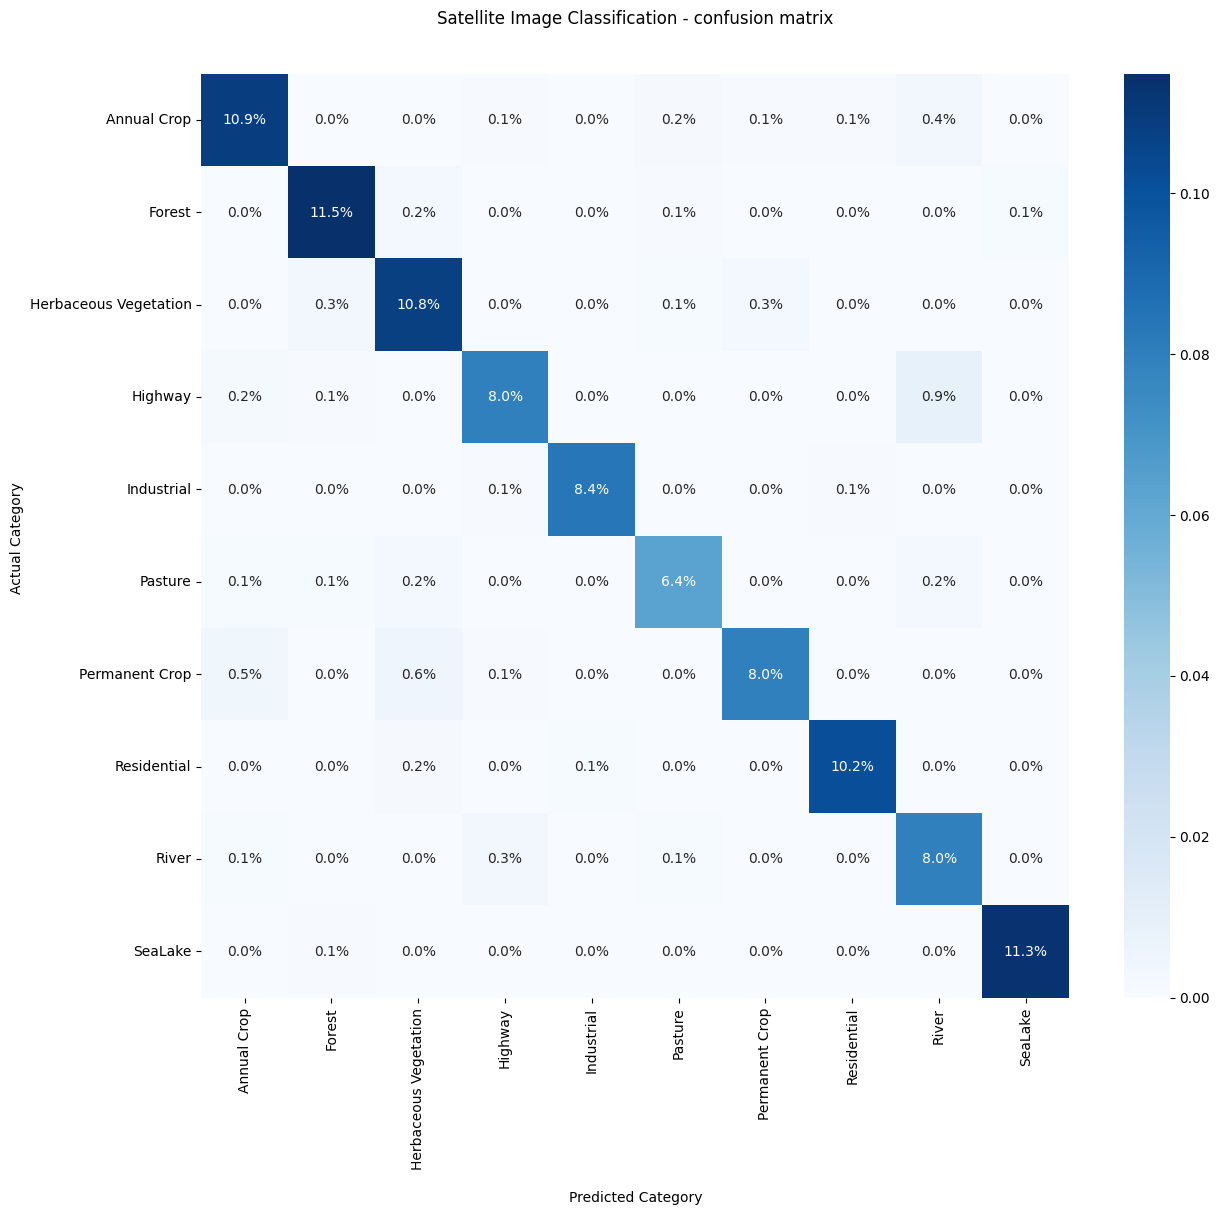

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(14, 12))
sns.heatmap(cf_matrix/len(X_test), annot=True, fmt=".1%", cmap='Blues', ax=ax)

ax.set_title('Satellite Image Classification - confusion matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

labels = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'SeaLake']
ax.xaxis.set_ticklabels(labels, rotation=90)
ax.yaxis.set_ticklabels(labels, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

### Predictions

1/1 [==============================] - 0s 147ms/step


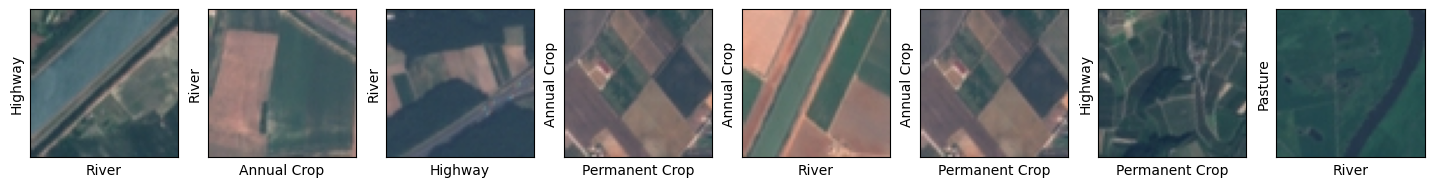

In [ ]:
labels = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'SeaLake']

N = 8
fig, ax = plt.subplots(1, N, figsize=(18, 4))
predictions = []
while len(predictions) < N:
  i = random.randint(0, X_test.shape[0])
  if (np.argmax(model.predict(X2_test[i].reshape(1, *X2_test[i].shape))) != np.argmax(y_test[i])):
  #if True:
    predictions.append(np.argmax(model.predict(X2_test[i].reshape(1, *X2_test[i].shape))))
    ax[len(predictions)-1].imshow(X_test[i])

    ax[len(predictions)-1].set_xlabel(labels[np.argmax(y_test[i])])
    ax[len(predictions)-1].set_xticks([])

    ax[len(predictions)-1].set_ylabel(labels[predictions[-1]])
    ax[len(predictions)-1].set_yticks([])
plt.show()

## From Satellite Image to Maps
- This model takes about 4 hours to train, on roughly 1'000 satellite-map pairs.
- It's using a **Generative Adversarial Network (GAN)** setup for training the map generating **U-Net**.

### Model

In [ ]:
!wget https://kauthentechstorage.blob.core.windows.net/models/pix2pix_model.zip -P trained_model
!unzip -q trained_model/pix2pix_model.zip

from tensorflow import keras

loaded_model = keras.models.load_model('models/generator_epoch_100_loss_0775')

--2023-09-14 09:44:15--  https://kauthentechstorage.blob.core.windows.net/models/pix2pix_model.zip
Resolving kauthentechstorage.blob.core.windows.net (kauthentechstorage.blob.core.windows.net)... 52.239.140.42
Connecting to kauthentechstorage.blob.core.windows.net (kauthentechstorage.blob.core.windows.net)|52.239.140.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206771201 (197M) [application/x-zip-compressed]
Saving to: ‘trained_model/pix2pix_model.zip’

pix2pix_model.zip   100%[===================>] 197.19M  88.3MB/s    in 2.2s    

2023-09-14 09:44:18 (88.3 MB/s) - ‘trained_model/pix2pix_model.zip’ saved [206771201/206771201]



/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


### Satellite Images

In [ ]:
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
!tar -xf maps.tar.gz

--2023-09-14 09:44:27--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘maps.tar.gz’

maps.tar.gz         100%[===================>] 238.65M  4.12MB/s    in 2m 52s  

2023-09-14 09:47:19 (1.39 MB/s) - ‘maps.tar.gz’ saved [250242400/250242400]



In [ ]:
import os
import numpy as np

def load_images(path, size=(256, 512)):
  sat_imgs, map_imgs = list(), list()
  for filename in os.listdir(path):
    pixels = keras.preprocessing.image.load_img(os.path.join(path, filename), target_size=size)
    pixels = keras.preprocessing.image.img_to_array(pixels)
    sat_img, map_img = pixels[:, :256], pixels[:, 256:]
    sat_imgs.append((sat_img - 127.5) / 127.5)
    map_imgs.append((map_img - 127.5) / 127.5)

  return [np.asarray(sat_imgs), np.asarray(map_imgs)]

In [ ]:
sat_imgs, map_imgs = load_images(os.path.join('maps', 'train'))
sat_vals, map_vals = load_images(os.path.join('maps', 'val'))

In [ ]:
from PIL import Image
import random

for i in range(20):
  sat_bytes = ((sat_vals[random.randint(0, len(sat_vals)-1)] + 1) * 127.5).astype(np.uint8)
  im = Image.fromarray(sat_bytes)
  im.save(f"example{str(i).zfill(2)}.png")

### Gradio
[Gradio](https://gradio.app/) is Python's equivalent of [R-Shiny](https://shiny.rstudio.com/)

In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.4 MB/s eta 0:

In [ ]:
import gradio as gr
import numpy as np

def pix2pix(sat_img):
  sat_img = (sat_img - 127.5) / 127.5
  sat_img = sat_img.reshape(-1, 256, 256, 3)
  map_img = loaded_model.predict(sat_img)
  map_img = ((map_img.reshape(256, 256, 3)+ 1) * 127.5).astype(np.uint8)
  return map_img


demo = gr.Interface(fn=pix2pix,
                    inputs=gr.Image(shape=(256, 256)),
                    outputs=gr.Image(shape=(256, 256)),
                    examples=[f"example{str(i).zfill(2)}.png" for i in range(20)])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://da13e59236bbe6e8ef.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# History

## Since 1989

- Python started as a hobby programming project of **Guido van Rossum** over the Christmas holidays in 1989.

- It was inspired by the simplicity of the [ABC programming language](https://en.wikipedia.org/wiki/ABC_(programming_language)). Python is much easier to code than C, C++, Perl or other languages of that time. Yet it is powerful!

- In 1991, version 0.9.0 was published and open to the world.

- Python is an **interpreted language**, meaning you write the **text code** to a file, and an **interpreter**, reads that file line by line and turns that code into **instructions for the computer**.


<img src="https://upload.wikimedia.org/wikipedia/commons/e/e2/Guido-portrait-2014-drc.jpg" alt="guido" width="1000px"/>


## The Zen of Python

In [ ]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Zen_of_Python#Principles" width="1000" height="600"></iframe>

## The Name

Guido was a big fan of **Monty Python's Flying Circus**.

In [ ]:
%%html
<iframe width="1000" height="562" src="https://www.youtube.com/embed/2AxiATxLofk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Python for Scientific Use

- Python version 1.0 was released in 1994

- Introduction of `lambda`, `map`, `filter`, and `reduce` (inspired from [Lisp](https://en.wikipedia.org/wiki/Lisp_(programming_language)))
- The [National Institute for Standards and Technology](https://www.nist.gov/) introduced Python for scientific use. **Many scientists were great at research and data but not necessarily great at coding** - Python was the solution to that problem.

<img src="https://images.unsplash.com/photo-1541233349642-6e425fe6190e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1035&q=80" alt="guido" height="600px"/>

## Computer Programming for Everybody

- Funding proposal sent to [DARPA](https://en.wikipedia.org/wiki/DARPA) in August 1999. _What will happen if users can program their own computer?_
  - develop a new computing curriculum suitable for high school and college students
  - create better, easier-to-use tools for program development and analysis
  - build a user community around all of the above, encouraging feedback and self-help

<img src="https://images.unsplash.com/photo-1461088945293-0c17689e48ac?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2342&q=80" alt="everyone" width="1000px"/>

## Python 2.0

- Python 2.0 was released in 2000.
- `Comprehension` and `garbage collection`
- In 2001, the [Python Software Foundation](https://www.python.org/psf/) was created, with the _mission to promote, protect, and advance the Python programming language, and to support and facilitate the growth of a diverse and international community of Python programmers_.
- The yearly [PyCon](https://pycon.org/) conference was created.

## Communities & Start-ups

Python enters the **Web Development** realm. Frameworks like [Jinja](https://en.wikipedia.org/wiki/Jinja_(template_engine)), [Flask](https://flask.palletsprojects.com/en/2.2.x/), and [Django](https://www.djangoproject.com/) developed big communities almost immediately.

Python gained traction in the **start-up world** (not so much in large enterprises)
- ease of use
- rapid development
- low cost to host it

<img src="https://images.unsplash.com/photo-1559136555-9303baea8ebd?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80" alt="everyone" width="1000px"/>


## Python 3.0

- Released in 2008
- Python 3 is not compatible with Python 2 (The guiding principle of Python 3 was _reduce feature duplication by removing the old ways of doing things_)

## Dropbox

- Dropbox started in 2007 and counted 3 million users in 2009.
- It was written in Python!
- Seeing Python scale so well, paved its way into enterprise adoption.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Dropbox_logo_2017.svg/2880px-Dropbox_logo_2017.svg.png" alt="everyone" width="1000px"/>

## Financial Crisis

Financial institutions began
- looking at data to spot patterns
- make decisions
- manage operations.

There was an intense focus on reducing risk. These companies had **plenty of data but no great way to access it**.

💐 Python came to the rescure and really florished:
- **Pandas** for quantitative analysis on (financial) data
- **NumPy**
- **SciKit**
- **Matplotlib**

<img src="https://images.unsplash.com/photo-1611974789855-9c2a0a7236a3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80" alt="everyone" width="1000px"/>

- Where previously statisticians and analysts used **R** for these sorts of things, they found Python to be much more palatable for those folks without a heavy development background.

- Python soon became the **top choice for data science**



## 2023

[Kaggle](https://www.kaggle.com/) is the world’s largest community of data scientists:
- 8 million members
- 300 competitions
- 4 million solutions
- 50'000 datasets

In the [2021 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/c/kaggle-survey-2021/data), Python leads in most data science related categories.

In [ ]:
from requests import get
import pandas as pd

def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(filename, 'wb')
    csv_file.write(res.content)
    csv_file.close()

download_save('https://kauthentechstorage.blob.core.windows.net/datasets/kaggle_survey_2022_responses.csv', 'kaggle_survey_2022_responses.csv')
df = pd.read_csv('kaggle_survey_2022_responses.csv', header=[0, 1], low_memory=False)

In [ ]:
print(f'{len(df)} responses')

23997 responses


In [ ]:
df.sample(5)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
22461,450,60-69,Man,Colombia,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17490,239,40-44,Man,Japan,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12505,263,18-21,Man,India,Yes,NaN,edX,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
564,193,25-29,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
2836,1268,60-69,Man,Taiwan,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


### Most used Language

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_barplot(df, title):
  fig, ax = plt.subplots(1, 1,figsize=(12, 8))
  sns.barplot(data=df.reset_index().sort_values(by='count', ascending=False),
              x='count',
              y='index').set_title(title)
  plt.show()

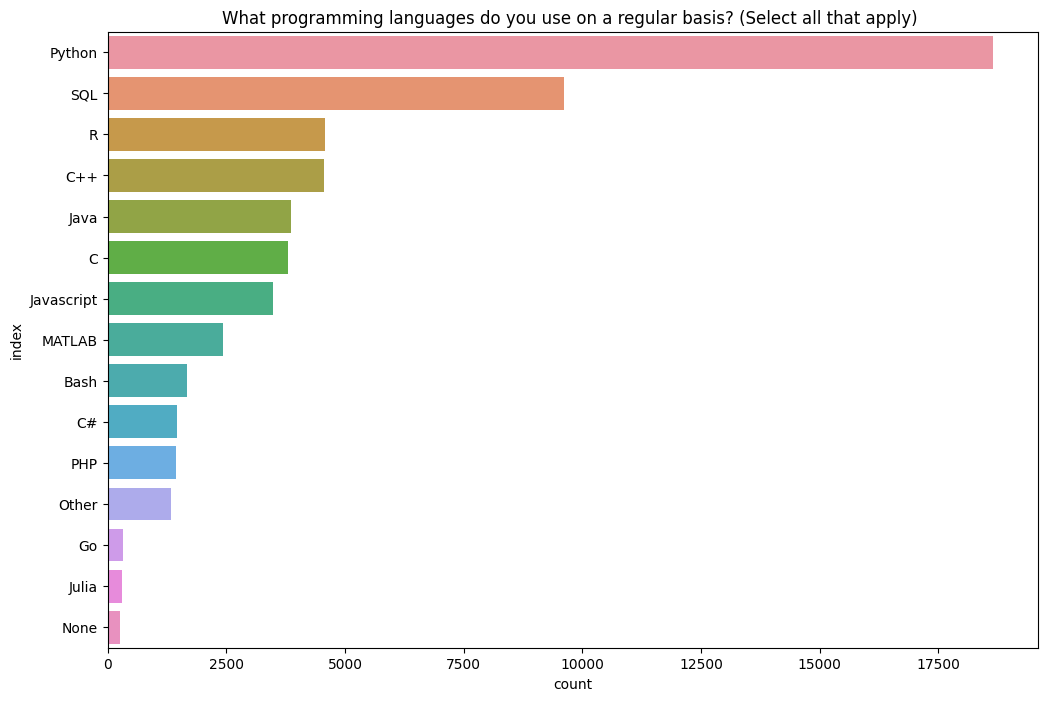

In [ ]:
columns = [col for col in df.columns if 'What programming languages do you use on a regular basis?' in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

### Most used IDE
Integrated Development Environment

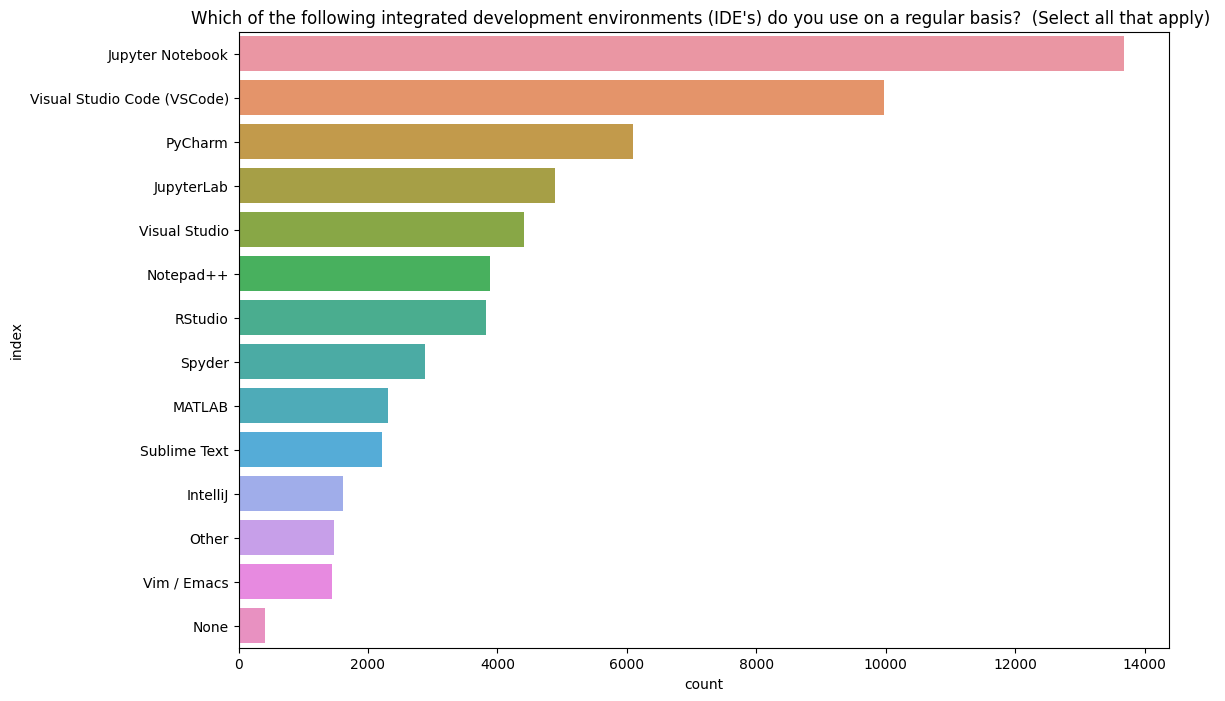

In [ ]:
columns = [col for col in df.columns if "Which of the following integrated development environments (IDE's) do you use on a regular basis?" in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

### Most used notebook products

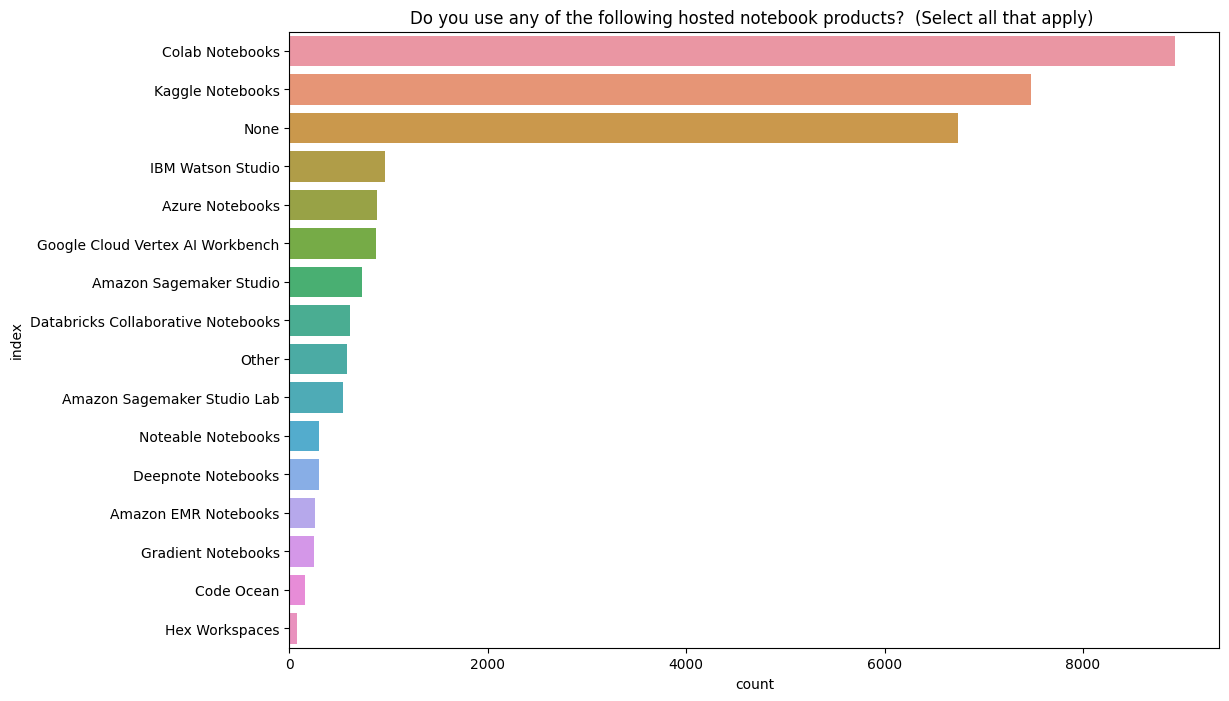

In [ ]:
columns = [col for col in df.columns if 'hosted notebook products' in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

### Most used visualization libraries

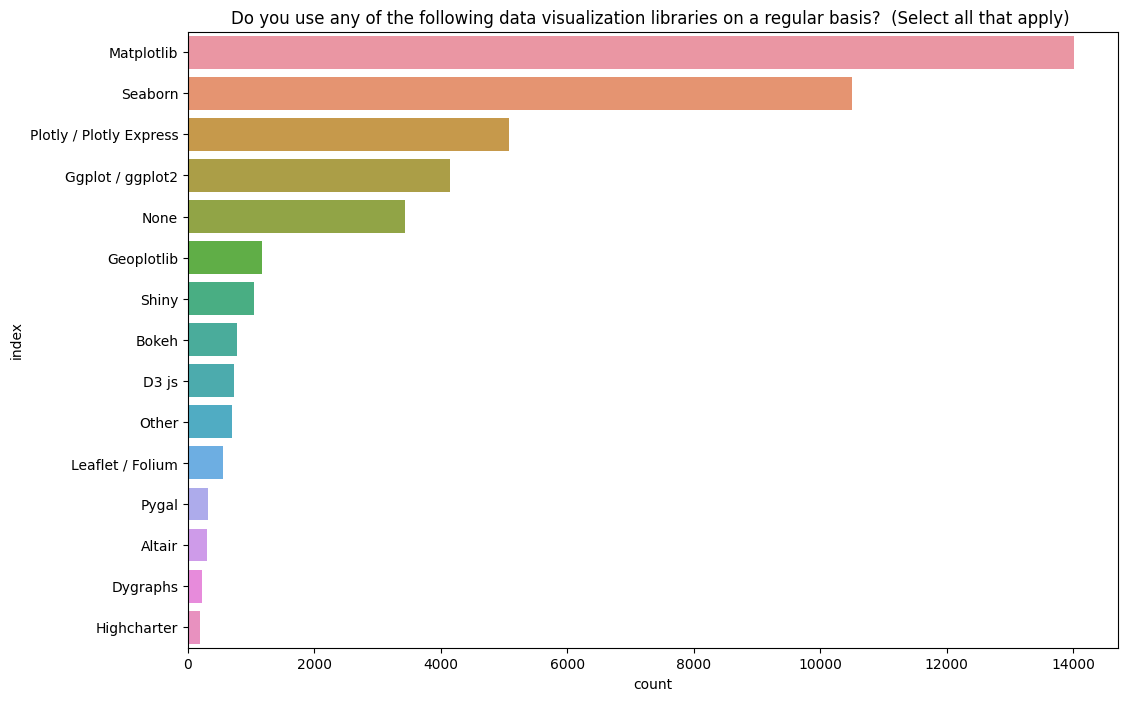

In [ ]:
columns = [col for col in df.columns if 'visualization libraries' in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

### Regularly used ML frameworks

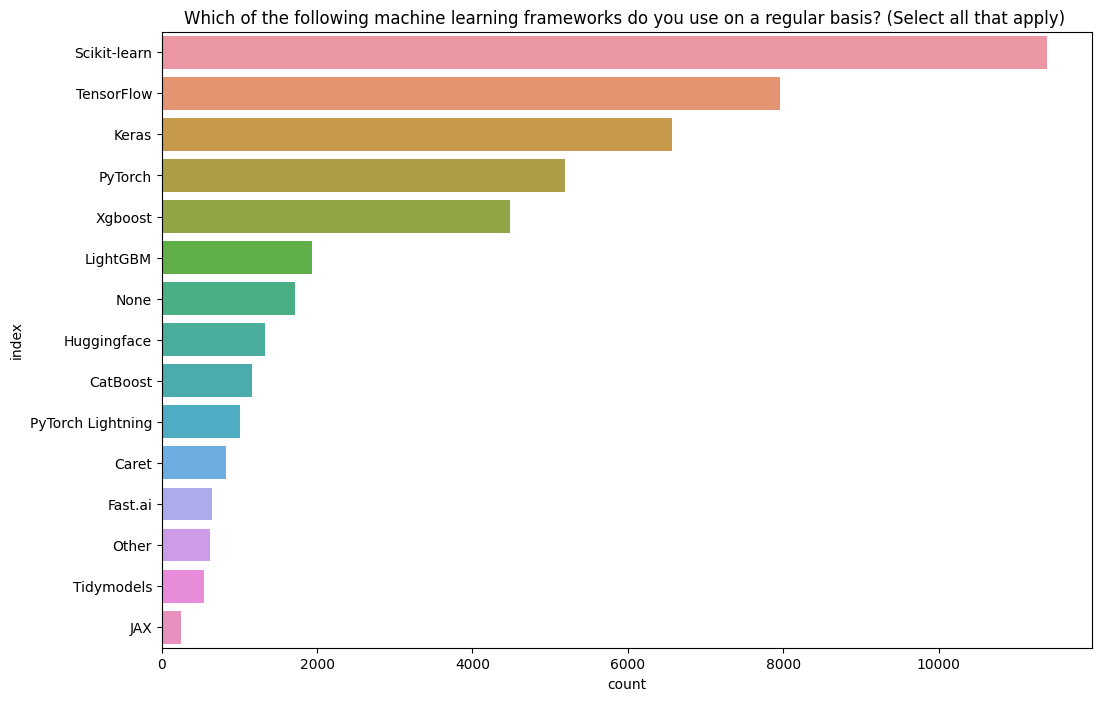

In [ ]:
columns = [col for col in df.columns if 'Which of the following machine learning frameworks do you use on a regular basis?' in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

### Regularly used ML algorithms

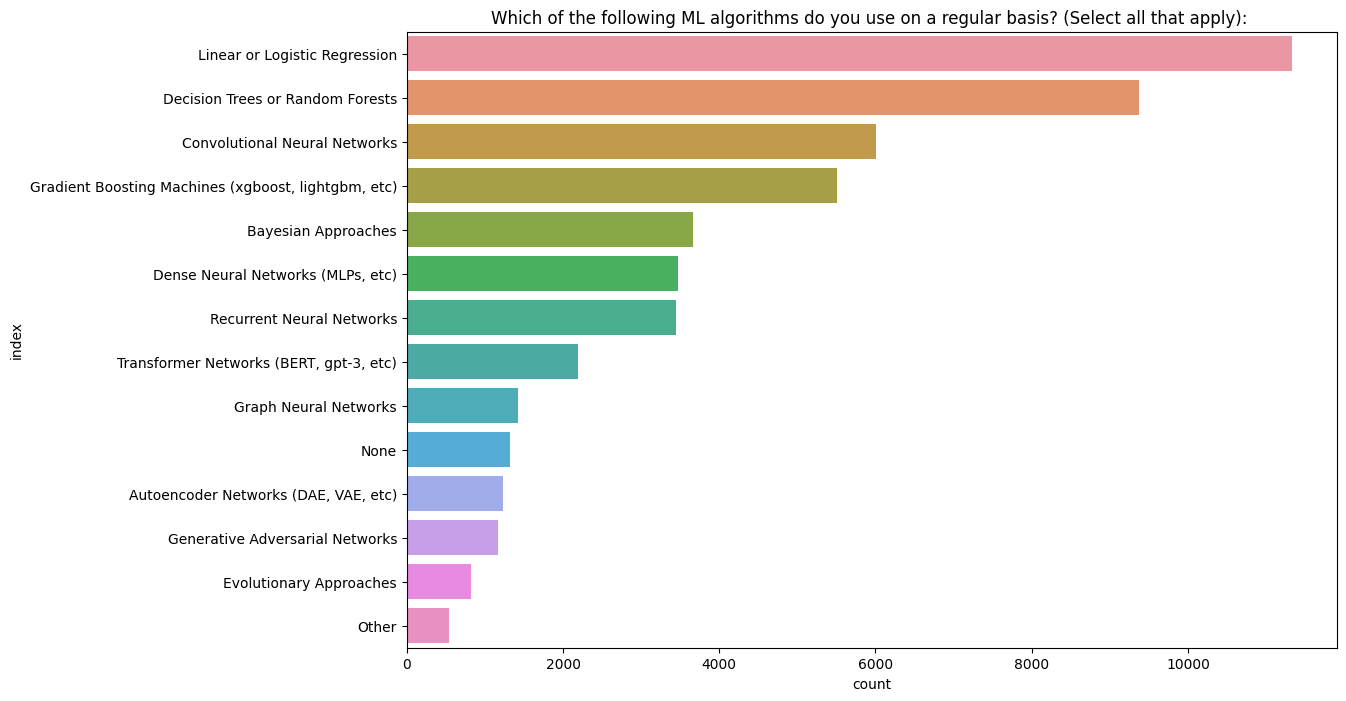

In [ ]:
columns = [col for col in df.columns if 'Which of the following ML algorithms do you use on a regular basis?' in col[1]]
dict_data = {k[1].split(' - ')[-1].strip(): v for k, v in df[columns].describe().loc['count'].items()}
df_data = pd.DataFrame.from_dict(dict_data, orient='index', columns=['count'])
generate_barplot(df_data, columns[0][1].split('-')[0])

## Future

- Python for Mobile Devices ?
- Python for Multi-Core processors? (_Spark_ helps, but _Julia_ has it built in)
- Python as sort of a _glue language_ to other technologies?

<img src="https://images.unsplash.com/photo-1546188994-07c34f6e5e1b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2342&q=80" alt="future" width="1000px"/>

# Python Environment (Eurostat Datalab)
https://portal.eurostat-datalab.ecdp.tech.ec.europa.eu/

## Access (EU Login)

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_EU_Login.png" width="1000px"/>

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_EU_LoginConfirmation.png" width="1000px"/>

## Service Datalogue

We'll use the `Jupyterlab - lab-3.4.2 - all-spark-notebook`

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_Datalab_Catalogue.png" width="1000px"/>

## Environment

We'll use the `Jupyterlab - lab-3.4.2 - all-spark-notebook`

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_Datalab_Environment.png" width="1000px"/>

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_Datalab_ServiceData.png" width="1000px"/>

## Jupyter

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_Datalab_ServiceLogin.png" width="1000px"/>

<img src="https://kauthentechstorage.blob.core.windows.net/notebookimages/Eurostat_Jupyter.png" width="1000px"/>



# When you're stuck...

## Dir
Ask for possible properties and methods

In [ ]:
dir("Hello")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


## Help

Ask for the documentation of anything

In [ ]:
help("Hello".count)

Help on built-in function count:

count(...) method of builtins.str instance
    S.count(sub[, start[, end]]) -> int
    
    Return the number of non-overlapping occurrences of substring sub in
    string S[start:end].  Optional arguments start and end are
    interpreted as in slice notation.



## Your Personal Assistant

- [GPT models](https://chat.openai.com/chat)
- [Github Copilot](https://github.com/features/copilot)

# UP NEXT
[Data Types](https://colab.research.google.com/drive/1vs3RcFbH69KzmB_jF-gXgmKw2o-UePwG?usp=sharing)